In [3]:
import pandas as pd
import numpy as np
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from collections import deque
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
import itertools
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

import warnings
warnings.simplefilter('ignore')

In [64]:
df = pd.read_csv('shot_logs.csv').set_index('GAME_ID1')

In [65]:
df.head()

,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
GAME_ID1,,,,,,,,,,,,,,,,,,,,
21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,01:09,10.8,2,1.9,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,00:14,3.4,0,0.8,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,00:00,NaN,3,2.7,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,1.9,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,2.7,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148


In [30]:
df.shape

(128069, 20)

In [7]:
print(df.isnull().sum())

MATCHUP                          0
LOCATION                         0
W                                0
FINAL_MARGIN                     0
SHOT_NUMBER                      0
PERIOD                           0
GAME_CLOCK                       0
SHOT_CLOCK                    5567
DRIBBLES                         0
TOUCH_TIME                       0
SHOT_DIST                        0
PTS_TYPE                         0
SHOT_RESULT                      0
CLOSEST_DEFENDER                 0
CLOSEST_DEFENDER_PLAYER_ID       0
CLOSE_DEF_DIST                   0
FGM                              0
PTS                              0
player_name                      0
player_id                        0
dtype: int64


In [66]:
df.W.replace(['W', 'L'], [1, 0], inplace=True)
df.LOCATION.replace(['H', 'A'], [1, 0], inplace=True)

In [9]:
df.head()

,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
GAME_ID1,,,,,,,,,,,,,,,,,,,,
21400899,"MAR 04, 2015 - CHA @ BKN",0,1,24,1,1,01:09,10.8,2,1.9,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
21400899,"MAR 04, 2015 - CHA @ BKN",0,1,24,2,1,00:14,3.4,0,0.8,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
21400899,"MAR 04, 2015 - CHA @ BKN",0,1,24,3,1,00:00,NaN,3,2.7,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
21400899,"MAR 04, 2015 - CHA @ BKN",0,1,24,4,2,11:47,10.3,2,1.9,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
21400899,"MAR 04, 2015 - CHA @ BKN",0,1,24,5,2,10:34,10.9,2,2.7,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148


In [10]:
print(df.isnull().sum())

MATCHUP                          0
LOCATION                         0
W                                0
FINAL_MARGIN                     0
SHOT_NUMBER                      0
PERIOD                           0
GAME_CLOCK                       0
SHOT_CLOCK                    5567
DRIBBLES                         0
TOUCH_TIME                       0
SHOT_DIST                        0
PTS_TYPE                         0
SHOT_RESULT                      0
CLOSEST_DEFENDER                 0
CLOSEST_DEFENDER_PLAYER_ID       0
CLOSE_DEF_DIST                   0
FGM                              0
PTS                              0
player_name                      0
player_id                        0
dtype: int64


In [67]:
null_data = df[df.isnull().any(axis=1)]
null_data

,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
GAME_ID1,,,,,,,,,,,,,,,,,,,,
21400899,"MAR 04, 2015 - CHA @ BKN",0,1,24,3,1,00:00,NaN,3,2.7,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
21400845,"FEB 25, 2015 - CHA @ CHI",0,1,12,6,2,00:04,NaN,0,0.7,25.2,3,missed,"Butler, Jimmy",202710,3.6,0,0,brian roberts,203148
21400768,"FEB 08, 2015 - CHA vs. IND",1,0,-1,14,4,00:01,NaN,5,3.7,34.4,3,missed,"Hill, George",201588,3.6,0,0,brian roberts,203148
21400742,"FEB 05, 2015 - CHA vs. WAS",1,1,7,10,3,00:01,NaN,2,3.6,13.1,2,made,"Butler, Rasual",2446,2.5,1,2,brian roberts,203148
21400611,"JAN 19, 2015 - CHA vs. MIN",1,1,25,7,2,00:02,NaN,5,5.0,12.0,2,missed,"Williams, Mo",2590,4.0,0,0,brian roberts,203148
21400611,"JAN 19, 2015 - CHA vs. MIN",1,1,25,12,3,00:03,NaN,2,2.3,17.9,2,missed,"Daniels, Troy",203584,2.7,0,0,brian roberts,203148
21400600,"JAN 17, 2015 - CHA vs. IND",1,1,9,7,2,00:03,NaN,2,1.7,10.4,2,made,"Sloan, Donald",202388,2.7,1,2,brian roberts,203148
21400600,"JAN 17, 2015 - CHA vs. IND",1,1,9,11,3,00:01,NaN,6,4.6,18.3,2,missed,"Rudez, Damjan",204014,2.2,0,0,brian roberts,203148
21400478,"DEC 31, 2014 - CHA @ HOU",0,0,-19,7,4,00:13,NaN,3,3.3,27.1,3,missed,"Canaan, Isaiah",203477,5.6,0,0,brian roberts,203148


In [68]:
df_new=df[['LOCATION','W','SHOT_NUMBER','PERIOD','GAME_CLOCK','SHOT_CLOCK','DRIBBLES','TOUCH_TIME','SHOT_DIST','CLOSE_DEF_DIST','FGM']]

In [69]:
df_new['SHOT_CLOCK'].fillna(0, inplace=True)

In [36]:
df_new.head()

,LOCATION,W,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,CLOSE_DEF_DIST,FGM
GAME_ID1,,,,,,,,,,,
21400899,0,1,1,1,01:09,10.8,2,1.9,7.7,1.3,1
21400899,0,1,2,1,00:14,3.4,0,0.8,28.2,6.1,0
21400899,0,1,3,1,00:00,0.0,3,2.7,10.1,0.9,0
21400899,0,1,4,2,11:47,10.3,2,1.9,17.2,3.4,0
21400899,0,1,5,2,10:34,10.9,2,2.7,3.7,1.1,0


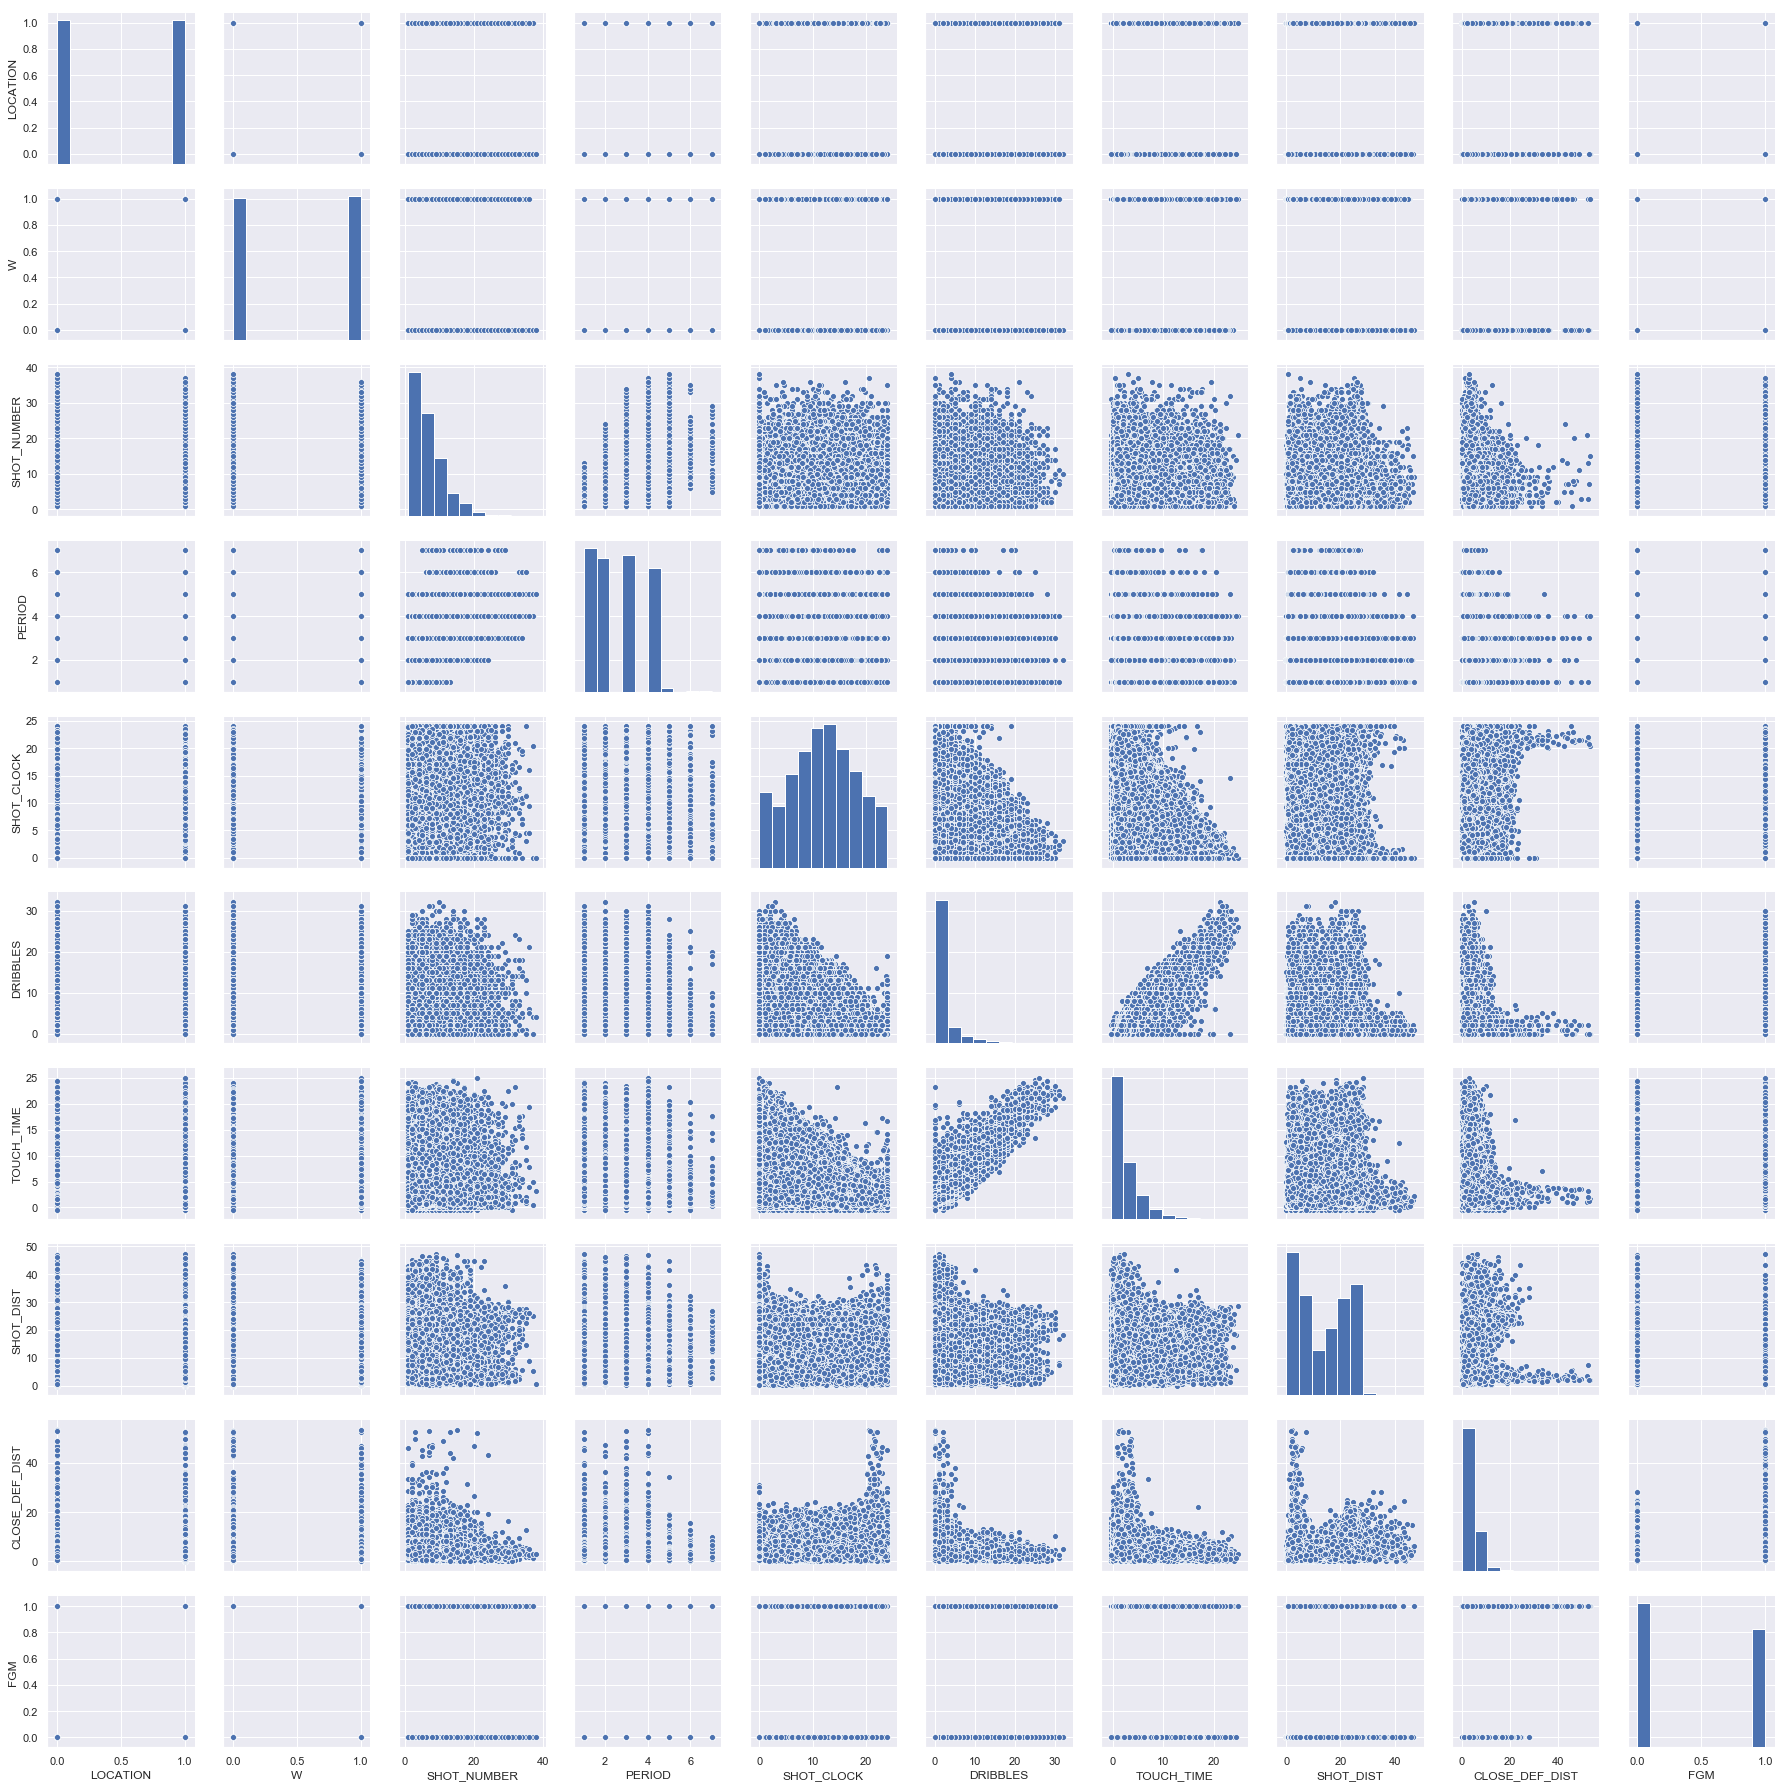

In [54]:
sns.pairplot(df_new,palette="Set2")

sns.set(rc={'figure.figsize':(15,8.27)})

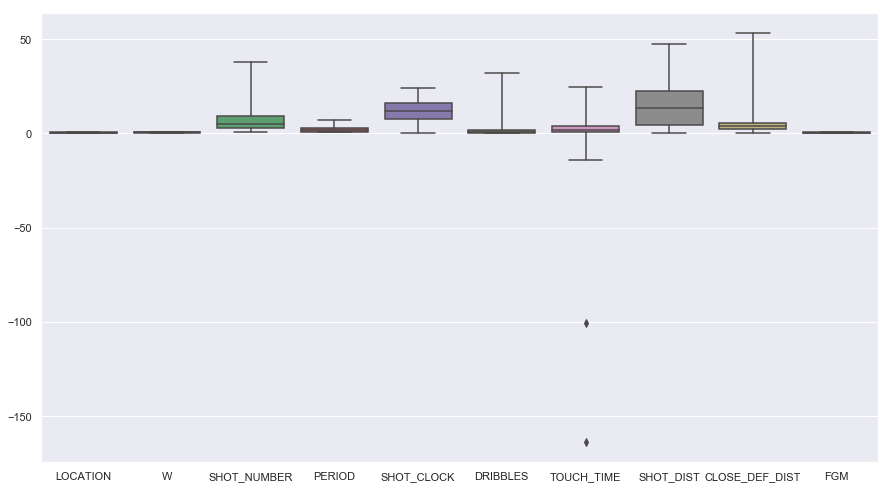

In [73]:
sns.boxplot(data=df_new,whis=16)
plt.show()

In [52]:
median = df_new.loc[df_new['TOUCH_TIME']<0, 'TOUCH_TIME'].median()
df_new["TOUCH_TIME"] = np.where(df_new["TOUCH_TIME"] <0, median,df_new['TOUCH_TIME'])

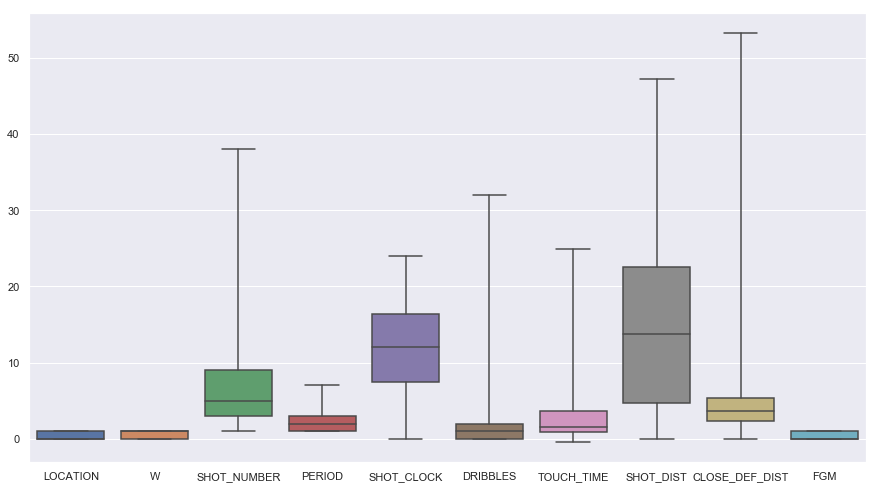

In [63]:
sns.boxplot(data=df_new,whis=16)
plt.ylim()
plt.show()


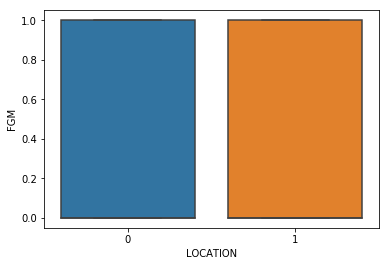

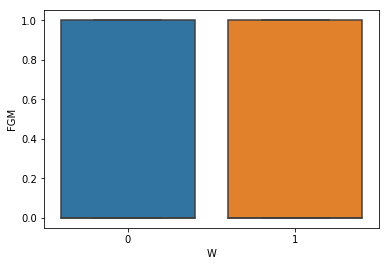

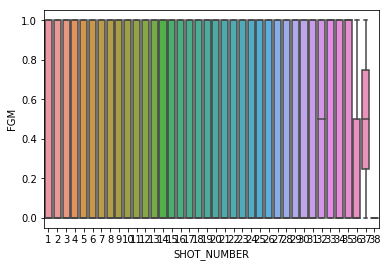

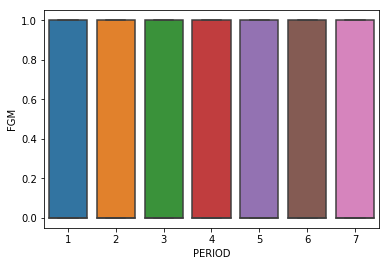

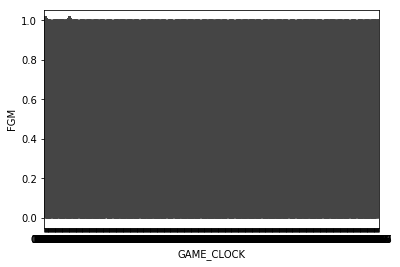

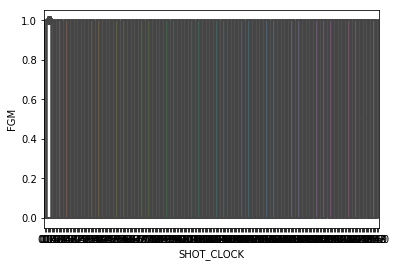

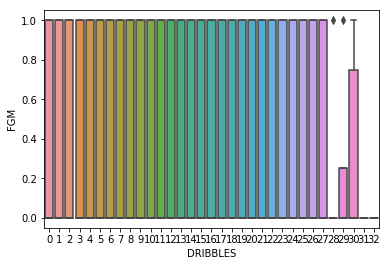

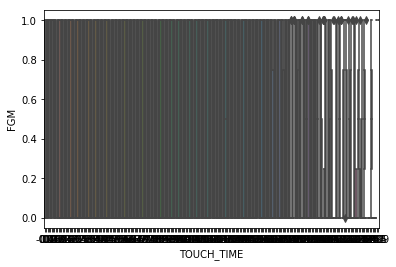

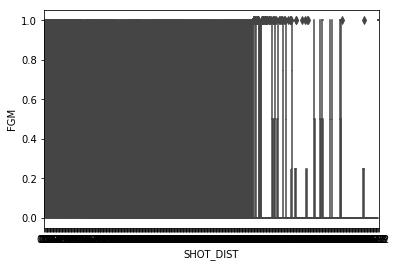

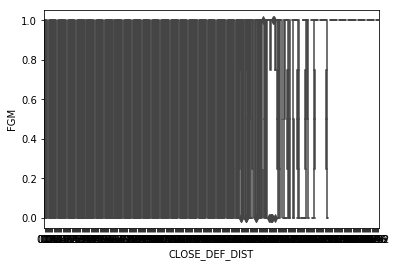

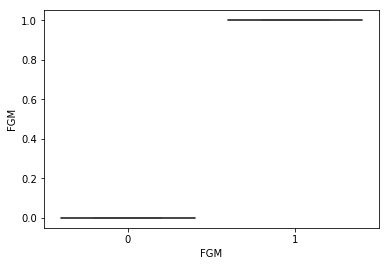

In [17]:
for col in df_new:
    sns.boxplot(x=col,y='FGM',data=df_new)
    plt.show()

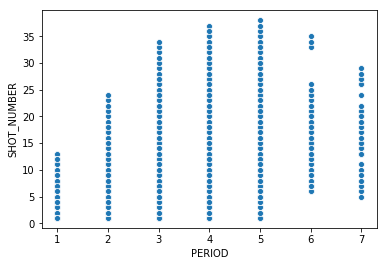

In [18]:
sns.scatterplot(x='PERIOD',y='SHOT_NUMBER',data=df_new)
plt.show()

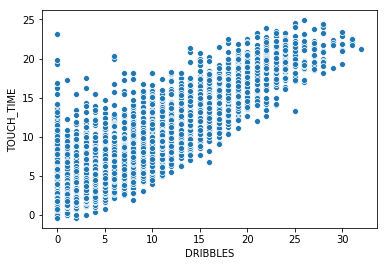

In [19]:
sns.scatterplot(x='DRIBBLES',y='TOUCH_TIME',data=df_new)
plt.show()

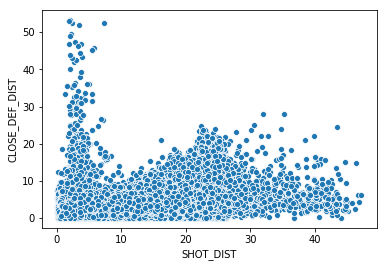

In [20]:
sns.scatterplot(x='SHOT_DIST',y='CLOSE_DEF_DIST',data=df_new)
plt.show()

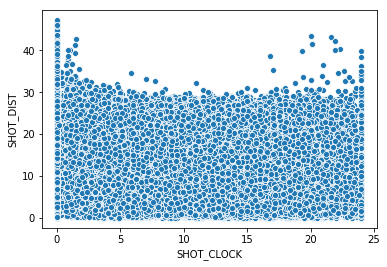

In [21]:
sns.scatterplot(x='SHOT_CLOCK',y='SHOT_DIST',data=df_new)
plt.show()

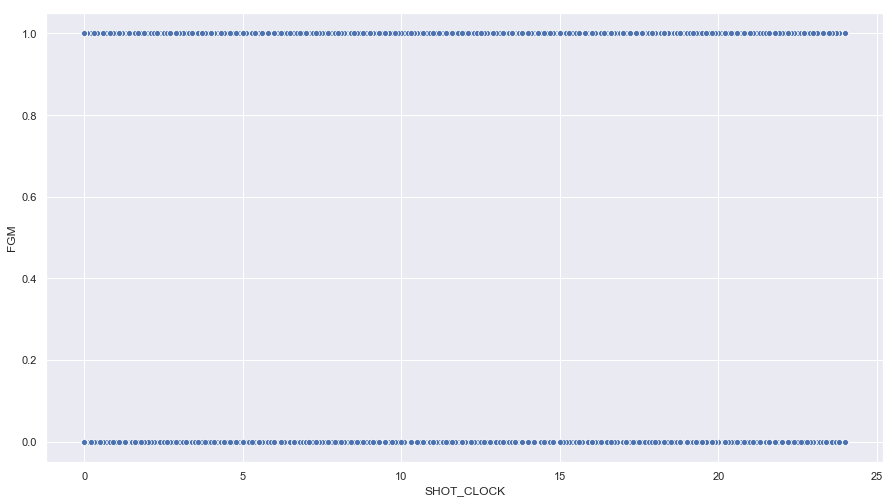

In [74]:
sns.scatterplot(x='SHOT_CLOCK',y='FGM',data=df_new)
plt.show()

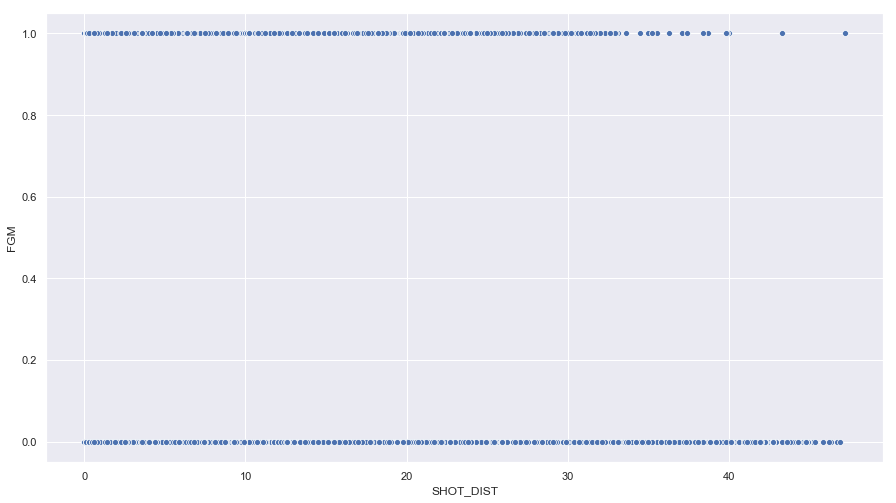

In [76]:
sns.scatterplot(x='SHOT_DIST',y='FGM',data=df_new)
plt.show()

In [ ]:
sns.scatterplot(x='SHOT_CLOCK',y='FGM',data=df_new)
plt.show()

In [23]:
df_new[['TOUCH_TIME'<0]]==df_new[['TOUCH_TIME']].mean()

TypeError: '<' not supported between instances of 'str' and 'int'

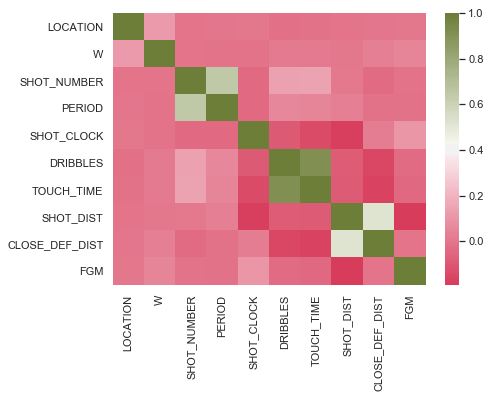

In [75]:
corr = df_new.corr()
plt.figure(figsize=(7, 5))
colormap = sns.diverging_palette(5, 100, as_cmap=True)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,cmap=colormap)

N=1280069
colors=np.random.rand(N)
plt.scatter(x=df_new['TOUCH_TIME'],y=df_new[['FGM']],c=colors,alpha=0.5)
plt.show()

In [20]:
print(df_new.isnull().sum())

LOCATION          0
W                 0
SHOT_NUMBER       0
PERIOD            0
GAME_CLOCK        0
SHOT_CLOCK        0
DRIBBLES          0
TOUCH_TIME        0
SHOT_DIST         0
CLOSE_DEF_DIST    0
FGM               0
dtype: int64


In [22]:
inp_v=df_new[['LOCATION','W','SHOT_NUMBER','PERIOD','GAME_CLOCK','SHOT_CLOCK','DRIBBLES','TOUCH_TIME','SHOT_DIST','CLOSE_DEF_DIST']]

In [23]:
x=inp_v
y=df_new[['FGM']]

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)